In [12]:
import pandas as pd
import numpy as np
import regex as re
import pylab as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plot
import src

warnings.filterwarnings('ignore')

SyntaxError: expected ':' (src.py, line 49)

In [9]:
data = pd.read_csv('../Proyecto-Shark/attacks.csv', low_memory=False, encoding= "ISO-8859-1")
pd.set_option('display.max_columns', None)

In [10]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [ ]:
data.shape

In [ ]:
data.isnull().sum().plot.bar()

In [ ]:
#Revisamos los tipos de datos
data.info()

### Borro nulos

In [7]:
# Elimino filas con valores nulos puesto que no se pueden eliminar columnas
data.dropna(how = "all", inplace = True)

In [8]:
data.shape

(8703, 24)

In [9]:
data.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Elimino duplicados

In [10]:
# Con drop_duplicates eliminamos duplicados

In [11]:
data=data.drop_duplicates()

data.drop_duplicates(inplace=True)

In [12]:
data.shape

(6311, 24)

In [13]:
data.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Compruebo que no existen más duplicados

data.duplicated().any()

False

In [15]:
data.shape

(6311, 24)

In [16]:
#Elimino filas por número de índice, en las cuales más del 90% son valores nulos, pero no en su totalidad

In [17]:
data.drop([6302 ,6303, 6304, 6305, 6306, 6307, 6308, 6309, 25722], axis=0, inplace=True)

data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


<AxesSubplot: >

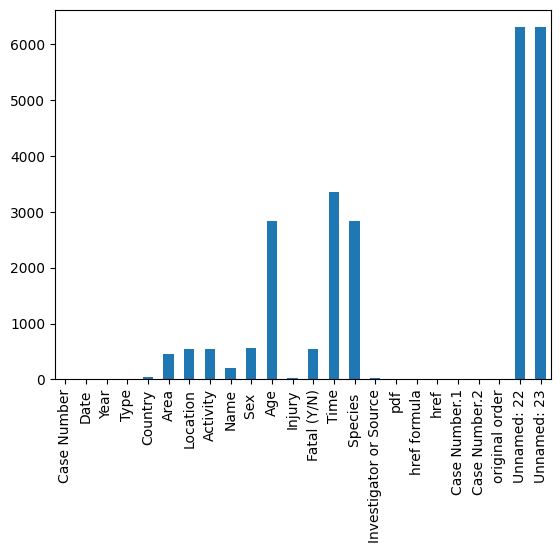

In [18]:
data.isnull().sum().plot.bar()

In [19]:
# NO tiene sentido que sigamos manteniendo las columnas con valores nulos (a pesar de las restricciones)

In [20]:
# Volvemos a explorar columnas que contengan nulos

In [21]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [22]:
# Las columnas que más nulos contienen son: Age, Time y Species

### Cambiar 'null' por 'Unknown'

In [23]:
data["Type"] = data["Type"].fillna('Unknown')

In [24]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6302 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

Case Number                  1
Date                         0
Year                         2
Type                         0
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [25]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6302 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

Case Number                  1
Date                         0
Year                         2
Type                         0
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [26]:
data.shape

(6302, 24)

In [27]:
# Aquí me doy cuenta de que sustituir valores nulos por 'Unknowns' NO SIRVE PARA NADA!!

In [28]:
# Aquí es cuando empiezo a formular una "teoría/hipótesis" que es, centrarme en un ÚNICO país (tengo datos de demasiados países)

<AxesSubplot: >

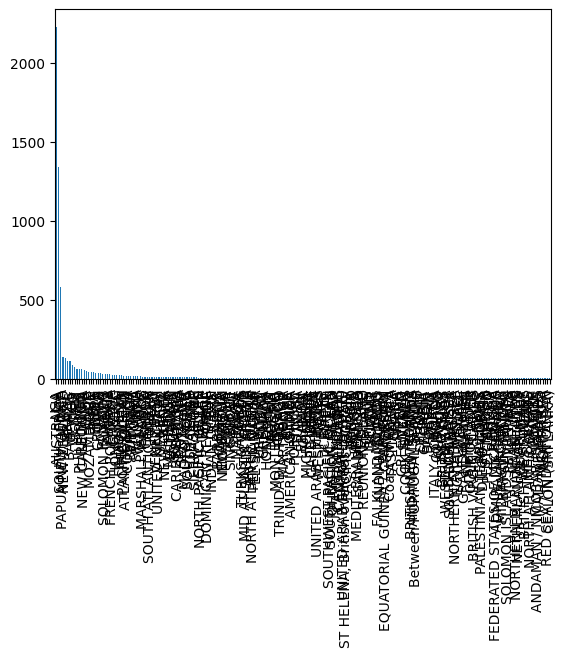

In [29]:
data["Country"].value_counts().plot.bar()

In [30]:
data['Country'].value_counts()

USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: Country, Length: 212, dtype: int64

In [31]:
df_usa = data[data['Country'] == 'USA']

In [32]:
df_usa.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2215,1997.11.05.R,Reported 05-Nov-1997,1997.0,Unprovoked,USA,Florida,NaN,Swimming,"James Ogilvy, 31st in line for the British Throne",M,32,Thigh bitten,N,Mid morning,NaN,"The Mirror (London), 11/5/1997",1997.11.05.R-Ogilvy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.11.05.R,1997.11.05.R,4088.0,NaN,NaN
73,2017.10.18,18-Oct-2017,2017.0,Unprovoked,USA,Florida,"Lantana Beach, Palm Beach County",Swimming,Carlos Iribam,M,NaN,Puncture wounds & lacerations to foot,N,14h30,"Spinner shark, 4 to 5 feet","WPTV, 10/19/2017",2017.10.18-Iribam.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.18,2017.10.18,6230.0,NaN,NaN
4167,1958.02.01,01-Feb-1958,1958.0,Provoked,USA,US Virgin Islands,Water Island,Spearfishing on Scuba,"U.S. Navy U.D.T. Diver trainee, Ronald Gerringer",M,18,Chest bitten by speared shark PROVOKED INCIDENT,N,NaN,"Nurse shark, 1.5 m [5']","J, Randall, p.358 and L. Schultz & M. Malin, p...",1958.02.01-Gerringer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.02.01,1958.02.01,2136.0,NaN,NaN
5167,1925.05.00,May 1925,1925.0,Unprovoked,USA,Puerto Rico,"Condado Beach, San Juan",NaN,American University student,M,NaN,"Right arm nearly severed at shoulder, left wri...",N,NaN,NaN,"V.M. Coppleson (1958), pp.48 & 265",1925.05.00-AmericanUniversityStudent.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1925.05.00,1925.05.00,1136.0,NaN,NaN
5452,1907.08.08.R,Reported 08-Aug-1907,1907.0,Unprovoked,USA,New Jersey,Lower Delaware Bay,Wading,George Kell,M,NaN,Abrasion to chest,N,NaN,NaN,"New Oxford Item, 8/8/1907",1907.08.08.R-Kell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1907.08.08.R,1907.08.08.R,851.0,NaN,NaN


In [33]:
#data["Country"].value_counts().plot.bar()

In [34]:
# Con regex es posible tomar todos los valores que sean exclusivamente numéricos y el resto pasarlos a NaN
# Puedes reemplazar NaN por la media

In [35]:
df_usa.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [36]:
#Creo nueva variable df_final y empiezo a verlo más claro

In [37]:
# Para varias columnas, doble corchete
df_final = df_usa[['Date', 'Year', 'Type', 'Country', 'Area',
       'Activity', 'Sex ', 'Age', 'Fatal (Y/N)']].reset_index(drop=True)

<AxesSubplot: >

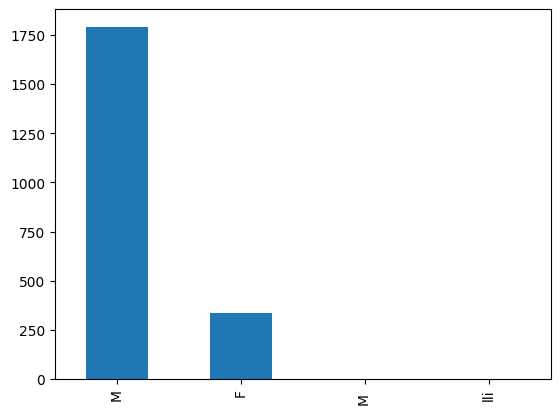

In [38]:
df_final['Sex '].value_counts().plot.bar()

In [39]:
#Con este gráfico empiezo a darme cuenta que los hombres son más atacados que las mujeres

In [40]:
df_final.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Activity', 'Sex ', 'Age',
       'Fatal (Y/N)'],
      dtype='object')

In [41]:
df_final.isnull().sum().sort_values()

Date             0
Year             0
Type             0
Country          0
Area             4
Sex             98
Activity       134
Fatal (Y/N)    188
Age            727
dtype: int64

### Convertir a numéricos

In [42]:
#Seguimos limpiando convirtiendo columnas con datos numéricos a su formato adecuado 

In [43]:
#Por ejemplo: La columna 'Year' a int.

In [44]:
df_final.sample(10)

,Date,Year,Type,Country,Area,Activity,Sex,Age,Fatal (Y/N)
1527,26-Aug-1976,1976.0,Unprovoked,USA,North Carolina,"Surfing, fell off surfboard",M,23,N
806,14-Oct-2003,2003.0,Unprovoked,USA,Florida,Surfing,M,19,N
2131,Reported 19-Oct-1883,1883.0,Unprovoked,USA,East coast,Jumped overboard,M,NaN,Y
425,17-Aug-2011,2011.0,Unprovoked,USA,North Carolina,Wading,F,20s,N
258,5-Jul-2014,2014.0,Unprovoked,USA,California,Surfing,M,NaN,N
318,25-Jun-2013,2013.0,Boating,USA,California,Kayaking / Fishing,M,NaN,N
1693,11-Nov-1962,1962.0,Unprovoked,USA,California,Spearfishing / Scuba diving (at surface),M,24,N
321,18-Jun-2013,2013.0,Unprovoked,USA,Hawaii,Swimming,M,28,N
1948,13-Jun-1931,1931.0,Provoked,USA,Hawaii,Gaffing & attempting to bring onboard a harpoo...,M,NaN,N
200,20-May2015,2015.0,Unprovoked,USA,Florida,Surfing,M,18,N


In [45]:
df_final['Year'] = df_final['Year'].astype(int)
df_final.head(5)

,Date,Year,Type,Country,Area,Activity,Sex,Age,Fatal (Y/N)
0,25-Jun-2018,2018,Boating,USA,California,Paddling,F,57,N
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,F,11,N
2,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,M,48,N
3,27-May-2018,2018,Unprovoked,USA,Florida,Fishing,M,52,N
4,26-May-2018,2018,Unprovoked,USA,Florida,Walking,M,15,N


In [46]:
# Convertimos de igual forma la columna 'Age' a numérica con una función

In [54]:
df_final['Age'] = df_final['Age'].apply(src.value_to_num)

In [ ]:
# Convertimos los nulos en -1

In [56]:
df_final['Age'] = pd.to_numeric(df_final['Age'], errors= 'coerce')
df_final['Age'] = df_final['Age'].fillna(-1).astype(int)
df_final['Age']

0       57
1       11
2       48
3       52
4       15
        ..
2224    -1
2225    -1
2226    -1
2227    -1
2228    -1
Name: Age, Length: 2229, dtype: int64

In [57]:
df_final.info()
df_final.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2229 non-null   object
 1   Year         2229 non-null   int64 
 2   Type         2229 non-null   object
 3   Country      2229 non-null   object
 4   Area         2225 non-null   object
 5   Activity     2095 non-null   object
 6   Sex          2131 non-null   object
 7   Age          2229 non-null   int64 
 8   Fatal (Y/N)  2041 non-null   object
dtypes: int64(2), object(7)
memory usage: 156.9+ KB


Date             0
Year             0
Type             0
Country          0
Area             4
Activity       134
Sex             98
Age              0
Fatal (Y/N)    188
dtype: int64

In [48]:
df_final[df_final['Sex '] == 'M']

,Date,Year,Type,Country,Area,Activity,Sex,Age,Fatal (Y/N)
2,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,M,48,N
3,27-May-2018,2018,Unprovoked,USA,Florida,Fishing,M,52,N
4,26-May-2018,2018,Unprovoked,USA,Florida,Walking,M,15,N
5,26-May-2018,2018,Unprovoked,USA,Florida,Standing,M,12,N
6,21-May-2018,2018,Unprovoked,USA,South Carolina,Boogie boarding,M,10,N
...,...,...,...,...,...,...,...,...,...
2222,"No date, Before 1902",0,Unprovoked,USA,Florida,Canoeing,M,NaN,Y
2224,Before 1958,0,Unprovoked,USA,Florida,Standing,M,NaN,N
2225,Before 1921,0,Unprovoked,USA,Florida,Fishing,M,NaN,N
2226,Before 17-Jul-1916,0,Unprovoked,USA,North Carolina,Swimming,M,NaN,N


In [49]:
#df_final.reset_index(drop=True)

In [50]:
# Sacar una nueva columna con los meses y otra con el año a partir de la columna 'Date'
# regex 101 https://regex101.com/

In [51]:
df_final

,Date,Year,Type,Country,Area,Activity,Sex,Age,Fatal (Y/N)
0,25-Jun-2018,2018,Boating,USA,California,Paddling,F,57,N
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,F,11,N
2,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,M,48,N
3,27-May-2018,2018,Unprovoked,USA,Florida,Fishing,M,52,N
4,26-May-2018,2018,Unprovoked,USA,Florida,Walking,M,15,N
...,...,...,...,...,...,...,...,...,...
2224,Before 1958,0,Unprovoked,USA,Florida,Standing,M,NaN,N
2225,Before 1921,0,Unprovoked,USA,Florida,Fishing,M,NaN,N
2226,Before 17-Jul-1916,0,Unprovoked,USA,North Carolina,Swimming,M,NaN,N
2227,Circa 1862,0,Unprovoked,USA,Hawaii,NaN,F,NaN,N


In [52]:
# Convertir a int
# Tomar solo los datos que sean a partir del año 1950 por ejemplo
df_final['Year']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
2224       0
2225       0
2226       0
2227       0
2228       0
Name: Year, Length: 2229, dtype: int64

In [53]:
# filtrar por >= 1950